<a href="https://colab.research.google.com/github/Chromathiccc/Colab_notebooks/blob/main/LoL_first_10_min_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import required variables
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# sklearn for ML models
from sklearn.linear_model import LinearRegression

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [3]:
df = pd.read_csv('/content/high_diamond_ranked_10min.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [47]:
df.isnull().sum().sum()

0

In [48]:
print (f'The Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The Dataset has 9879 rows and 40 columns


In [49]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551,22.367952,2.723150,0.495192,6.137666,6.183925,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664,18.457427,2.138356,0.500002,2.933818,3.011028,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000,276.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [50]:
# Copy of the original dataset for trimming of unneeded values
df2 = df.copy()
df2.drop(['gameId', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueDeaths', 'blueAssists', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueCSPerMin', 'blueGoldPerMin', 
          'redWardsPlaced', 'redWardsDestroyed', 'redDeaths', 'redAssists', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin','redGoldDiff', 'redExperienceDiff'], axis = 1, inplace = True)

df2.head(10)

,blueWins,blueFirstBlood,blueKills,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueGoldDiff,blueExperienceDiff,redFirstBlood,redKills,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed
0,0,1,9,0,0,0,0,643,-8,0,6,0,0,0,0
1,0,0,5,0,0,0,0,-2908,-1173,1,5,2,1,1,1
2,0,0,7,1,1,0,0,-1172,-1033,1,11,0,0,0,0
3,0,0,4,1,0,1,0,-1321,-7,1,5,0,0,0,0
4,0,0,6,0,0,0,0,-1004,230,1,6,1,1,0,0
5,1,0,5,1,1,0,0,698,101,1,3,0,0,0,0
6,1,1,7,1,1,0,0,2411,1563,0,6,0,0,0,0
7,0,0,5,0,0,0,0,-2615,-800,1,13,1,1,0,0
8,0,0,7,0,0,0,0,-1979,-771,1,7,2,1,1,0
9,1,1,4,1,1,0,0,-1548,-1574,0,5,0,0,0,0


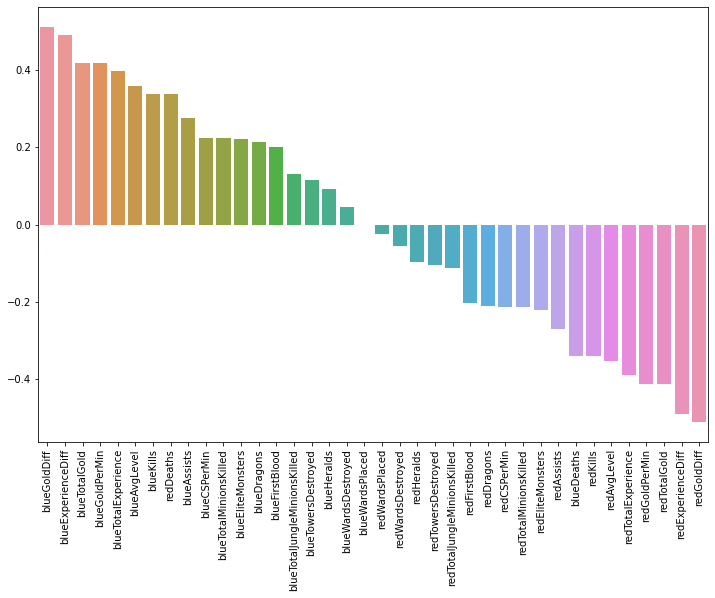

In [51]:

corr = df.corr()["blueWins"].sort_values(ascending=False).drop(["blueWins","gameId"])

plt.figure(figsize=(12,8))
sns.barplot(x=corr.index, y=corr.values)
plt.xticks(rotation = 90);

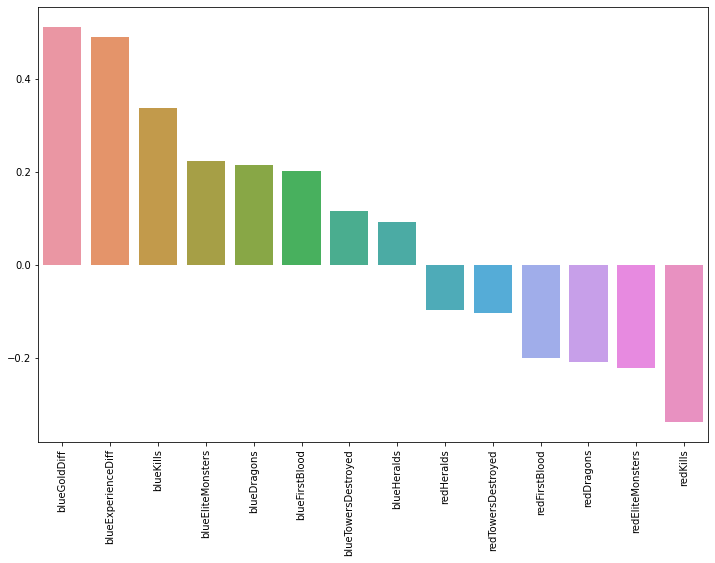

In [52]:
corr = df2.corr()["blueWins"].sort_values(ascending=False).drop(["blueWins"])

plt.figure(figsize=(12,8))
sns.barplot(x=corr.index, y=corr.values)
plt.xticks(rotation = 90);

In [53]:
df2['killsDiff'] = df2['blueKills'] - df2['redKills']
df2['eliteMonstersDiff'] = df2['blueEliteMonsters'] - df2['redEliteMonsters']
df2['dragonsDiff'] = df2['blueDragons'] - df2['redDragons']
df2['firstBloodDiff'] = df2['blueFirstBlood'] - df2['redFirstBlood']
df2['towersDiff'] = df2['blueTowersDestroyed'] - df2['redTowersDestroyed']

df2.drop(['blueKills', 'redKills', 'blueEliteMonsters', 'redEliteMonsters', 'blueDragons', 'redDragons', 'blueFirstBlood', 'redFirstBlood', 'blueTowersDestroyed', 'redTowersDestroyed'], axis = 1, inplace = True)

df2.head()

,blueWins,blueHeralds,blueGoldDiff,blueExperienceDiff,redHeralds,killsDiff,eliteMonstersDiff,dragonsDiff,firstBloodDiff,towersDiff
0,0,0,643,-8,0,3,0,0,1,0
1,0,0,-2908,-1173,1,0,-2,-1,-1,-1
2,0,0,-1172,-1033,0,-4,1,1,-1,0
3,0,1,-1321,-7,0,-1,1,0,-1,0
4,0,0,-1004,230,0,0,-1,-1,-1,0


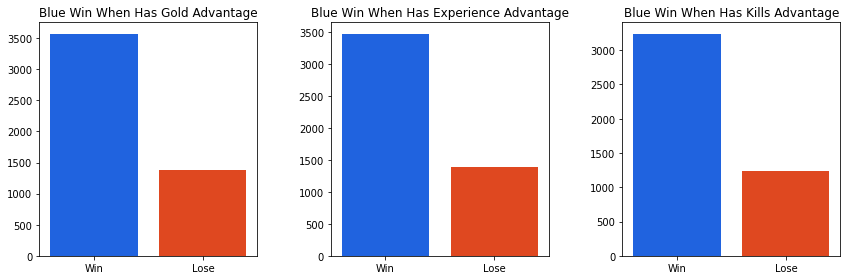

In [55]:
# Code adapted from
# https://www.kaggle.com/code/emresengul/exploratory-data-analysis-on-league-of-legends

palette=["#0059FF",'#FF3500']
fig, ax = plt.subplots(ncols=3, figsize=(12,4))
sns.barplot(x=df[df2["blueGoldDiff"]>0]["blueWins"].replace({1:"Win", 0:"Lose"}).value_counts().index, 
            y=df[df2["blueGoldDiff"]>0]["blueWins"].replace({1:"Win", 0:"Lose"}).value_counts().values, ax=ax[0], palette=palette)

sns.barplot(x=df[df2["blueExperienceDiff"]>0]["blueWins"].replace({1:"Win", 0:"Lose"}).value_counts().index, 
            y=df[df2["blueExperienceDiff"]>0]["blueWins"].replace({1:"Win", 0:"Lose"}).value_counts().values, ax=ax[1], palette=palette)

sns.barplot(x=df[df2["killsDiff"]>0]["blueWins"].replace({1:"Win", 0:"Lose"}).value_counts().index, 
            y=df[df2["killsDiff"]>0]["blueWins"].replace({1:"Win", 0:"Lose"}).value_counts().values, ax=ax[2], palette=palette)

ax[0].set_title("Blue Win When Has Gold Advantage")
ax[1].set_title("Blue Win When Has Experience Advantage")
ax[2].set_title("Blue Win When Has Kills Advantage")

plt.tight_layout()